In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
# set pandas
pd.set_option('display.width', 1000)

# use pandas to manage data
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')
combine = [train_df, test_df]

In [3]:
'''
PassengerId => 乘客ID
Pclass      => 乘客等级(1/2/3等舱位)  序列
Name        => 乘客姓名
Sex         => 性别                 离散型变量
Age         => 年龄                 连续型数值
SibSp       => 堂兄弟/妹个数
Parch       => 父母与小孩个数
Ticket      => 船票信息             混合了数值型以及字母数值型的数据类型
Fare        => 票价                 连续型数值
Cabin       => 客舱                 字母数值型数据
Embarked    => 登船港口             离散型变量

Survived    => 是否幸存             离散型变量
'''
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#默认倒数5行
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
# dtypes: float64(2), int64(5), object(5)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
# dtypes: float64(2), int64(4), object(5)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
'''
1. 一共有891个样本
2. Survived的标签是通过0或1来区分
3. 大概38%的样本是survived
4. 大多数乘客（>76%）没有与父母或是孩子一起旅行
5. 大约30%的乘客有亲属和/或配偶一起登船
6. 票价的差别非常大，少量的乘客（<1%）付了高达$512的费用
7. 很少的乘客（<1%）年纪在64-80之间
'''
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
# 通过使用 percentiles=[.61, .62] 来查看数据集可以了解到生存率为 38%
train_df.describe(percentiles=[.61, .62])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
61%,543.900000,0.000000,3.000000,32.000000,0.000000,0.000000,23.225000
62%,552.800000,1.000000,3.000000,32.000000,0.000000,0.000000,24.150000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
# 通过使用 percentiles=[.76, .77] 来查看Parch的分布，大多数乘客（>76%）没有与父母或是孩子一起旅行
train_df.describe(percentiles=[.76, .77])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
76%,677.400000,1.000000,3.000000,39.000000,1.000000,0.000000,31.387500
77%,686.300000,1.000000,3.000000,39.000000,1.000000,1.000000,33.656240
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
# 通过使用 percentile=[.68, .69] 来查看SibSp的分布
train_df.describe(percentiles=[.68, .69])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
68%,606.200000,1.000000,3.000000,35.000000,0.000000,0.000000,26.307500
69%,615.100000,1.000000,3.000000,35.000000,1.000000,0.000000,26.550000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
#通过使用 percentile=[.1, .2, .3, .4, .5, .6, .7, .8, .9, .99] 来查看Age和Fare的分布
train_df.describe(percentiles=[.1, .2, .3, .4, .5, .6, .7, .8, .9, .99])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
10%,90.000000,0.000000,1.000000,14.000000,0.000000,0.000000,7.550000
20%,179.000000,0.000000,1.000000,19.000000,0.000000,0.000000,7.854200
30%,268.000000,0.000000,2.000000,22.000000,0.000000,0.000000,8.050000
40%,357.000000,0.000000,2.000000,25.000000,0.000000,0.000000,10.500000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
60%,535.000000,0.000000,3.000000,31.800000,0.000000,0.000000,21.679200


In [13]:
'''
1. 各个乘客的Name 属性完全是唯一的（count=unique=891）
2. Sex特征里65%为男性（top=male，fre=577/count=891）
3. Cabin的count与unique并不相等，即说明有些乘客会共享一个cabin
4. Embarked一共有3种取值，其中从S港口登船的人最多
5. Ticket的特征下，有22%左右的重复值（unique=681）
'''
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Ilett, Miss. Bertha",male,1601,B96 B98,S
freq,1,577,7,4,644


In [14]:
# Pclass=1与Survived的相关性较大（ >0.5 ）
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [15]:
# Sex=female有着高达74%的生存率
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [16]:
train_df[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [17]:
train_df[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


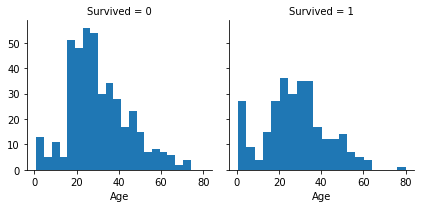

'\n观察：\n1. 婴儿（Age<=4）有较高的生存率（每个格子区间为4岁）\n2. 老人（Age=80）全部生还\n3. 大量的15-25年纪的乘客没有生还\n4. 乘客主要在15-35的年纪范围内\n\n结论：\n1. 我们需要将Age考虑到训练模型里\n2. 为Age特征补全null值\n3. 我们应该划分不同的年龄层\n'

In [18]:
# Age的柱状图
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)
plt.show()

'''
观察：
1. 婴儿（Age<=4）有较高的生存率（每个格子区间为4岁）
2. 老人（Age=80）全部生还
3. 大量的15-25年纪的乘客没有生还
4. 乘客主要在15-35的年纪范围内

结论：
1. 我们需要将Age考虑到训练模型里
2. 为Age特征补全null值
3. 我们应该划分不同的年龄层
'''

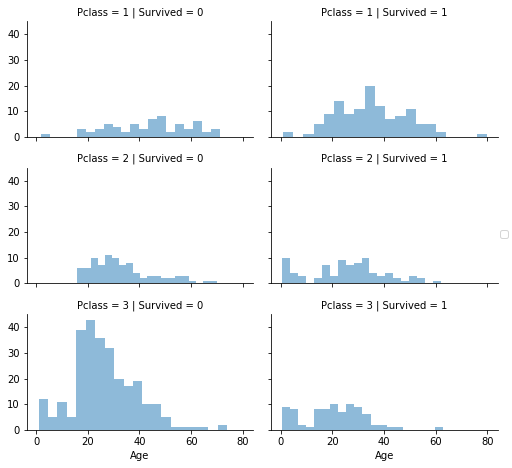

'\n观察：\n1. Pclass=3 有着最多的乘客，但是他们大多数却没有存活。这也验证了我们之前在“分类”里的假设 \n2. 在Pclass=2和Pclass=3中，大多数婴儿活了下来，进一步验证了我们之前在“分类”里的假设 \n3. 大多数Pclass=1的乘客存活，验证我们之前在“分类”里的假设\n4. 不同Pclass中Age的分布不同\n\n结论：\n1. 考虑将Pclass特征加入模型训练\n'

In [19]:
# Pclass的柱状图
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()
plt.show()

'''
观察：
1. Pclass=3 有着最多的乘客，但是他们大多数却没有存活。这也验证了我们之前在“分类”里的假设 
2. 在Pclass=2和Pclass=3中，大多数婴儿活了下来，进一步验证了我们之前在“分类”里的假设 
3. 大多数Pclass=1的乘客存活，验证我们之前在“分类”里的假设
4. 不同Pclass中Age的分布不同

结论：
1. 考虑将Pclass特征加入模型训练
'''

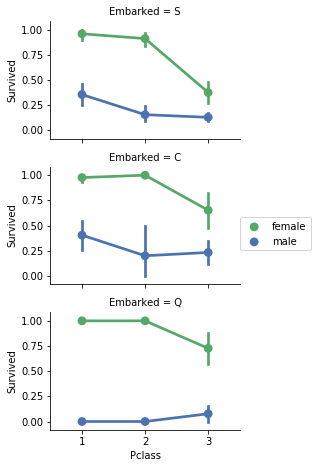

'\n观察：\n1. 女性乘客相对于男性乘客有着更高的存活率\n2. Embarked和Survived之间可能并没有直接的联系。 \n3. 对于Pclass=3以及男性乘客来说，Embarked的港口不同会导致存活率的不同\n\n结论：\n1. 将Sex特征加入训练模型\n2. 补全Embarked特征下的数据并将此特征加入训练模型\n'

In [20]:
grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex',order=[1,2,3],hue_order=train_df.Sex.unique(),palette='deep')
grid.add_legend()
plt.show()
'''
观察：
1. 女性乘客相对于男性乘客有着更高的存活率
2. Embarked和Survived之间可能并没有直接的联系。 
3. 对于Pclass=3以及男性乘客来说，Embarked的港口不同会导致存活率的不同

结论：
1. 将Sex特征加入训练模型
2. 补全Embarked特征下的数据并将此特征加入训练模型
'''

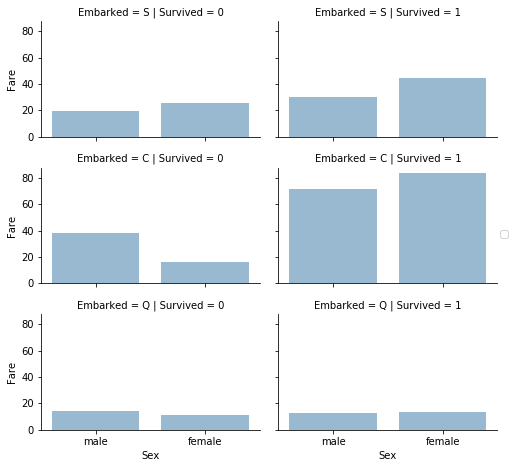

'\n观察：\n1. 付了高票价的乘客有着更高的生存率，验证了我们之前的假设\n2. Embarked与生存率相关，验证了我们之前所做的假设 \n\n结论：\n1. 考虑将Fare特征做不同的区间\n'

In [21]:
# 查看Embarked（离散非数值型），Sex（离散非数值型），Fare（连续数值型）与Survived（离散数值型）之间的关系
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', order=train_df.Sex.unique(),alpha=.5, ci=None)
grid.add_legend()
plt.show()
'''
观察：
1. 付了高票价的乘客有着更高的生存率，验证了我们之前的假设
2. Embarked与生存率相关，验证了我们之前所做的假设 

结论：
1. 考虑将Fare特征做不同的区间
'''

In [22]:
'''
通过丢弃某些特征，可以让我们处理更少的数据点，并让分析更简单。

根据我们之前的假设和结论，我们希望丢弃Cabin和Ticket这两个特征。

在这里需要注意的是，为了保持数据的一致，我们需要同时将训练集与测试集里的这两个特征均丢弃。
'''
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)
train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]
print('After', train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

Before (891, 12) (418, 11) (891, 12) (418, 11)
After (891, 10) (418, 9) (891, 10) (418, 9)


In [23]:
'''
通过已有的特征创建新特征：
我们在丢弃Name与PassengerId这两个特征之前，希望从Name特征里提取出Titles的特征，并测试Titles与survival之间的关系。

在下面的代码中，我们通过正则提取了Title特征，正则表达式为(\w+\.)，它会在Name特征里匹配第一个以“.”号为结束的单词。
同时，指定expand=False的参数会返回一个DataFrame。
'''
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [24]:
# 我们可以使用高一些更常见的名字或“Rare”来代替一些Title，如：
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess', 'Capt',
                                                 'Col', 'Don', 'Dr', 'Major',
                                                 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [25]:
# 我们可以将这些离散型的Title转换为有序的数值型
title_mapping = {"Mr":1, "Miss":2, "Mrs":3, "Master":4, "Rare":5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
    
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [26]:
# 现在我们可以放心的从训练集与测试集里丢弃Name特征。同时，我们也不再需要训练集里的PassengerId特征
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

In [27]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,3
2,1,3,female,26.0,0,0,7.9250,S,2
3,1,1,female,35.0,1,0,53.1000,S,3
4,0,3,male,35.0,0,0,8.0500,S,1


In [28]:
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()
'''
新的发现：
当我们画出Title，Age和Survived的图后，我们有了以下新的发现：
1. 大多数Title分段与年龄字段对应准确，比如，Title为Master平均年龄为5岁
2. 不同组别Title与生产率有一定的区分度。
3. 某些特定的title 如Mme，Lady，Sir的乘客存活率较高，但某些title如Don，Rev，Jonkheer的乘客存活率不高

结论：
1. 我们决定保留这个新的Title特征并加入到训练模型
'''

'\n新的发现：\n当我们画出Title，Age和Survived的图后，我们有了以下新的发现：\n1. 大多数Title分段与年龄字段对应准确，比如，Title为Master平均年龄为5岁\n2. 不同组别Title与生产率有一定的区分度。\n3. 某些特定的title 如Mme，Lady，Sir的乘客存活率较高，但某些title如Don，Rev，Jonkheer的乘客存活率不高\n\n结论：\n1. 我们决定保留这个新的Title特征并加入到训练模型\n'

In [29]:
'''
转换一个离散型的特征
现在我们可以将一些包含字符串数据的特征转换为数值型特征，因为在很多建模算法里，输入的参数要求为数值型。
这个步骤可以让我们达到补全数据的目标。
'''

#我们可以从转换Sex特征开始，将female转换为1，male转换为0。我们可以将新的特征命名为Gender：
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map({'female':1, 'male':0}).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


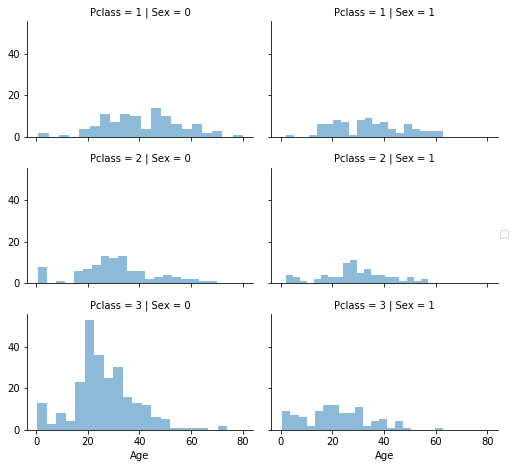

In [30]:
'''
补全连续数值型特征
现在我们可以开始为那些含null值或者丢失值的特征补全数据。我们首先会为Age特征补全数据。


现在我们总结一下三种补全连续数值型特征数据的方法：
1. 一个简单的方法是产生一个随机数，这个随机数的范围在这个特征的平均值以及标准差之间
2. 更精准的一个做法是使用与它相关的特征来做一个猜测。在这个案例中，我们发现Age，Gender和Pclass之间有关联。
   所以我们会使用一系列Pclass和Gender特征组合后的中值，作为猜测的Age值。
   所以我们会有一系列的猜测值如：当Pclass=1且Gender=0时，当Pclass=1且Gender=1时，等等…
3. 第三种方法是结合以上两种方法。我们可以根据一系列Pclass与Gender的组合，并使用第一种方法里提到的随机数来猜测缺失的Age值

方法1与方法3会在模型里引入随机噪音，多次的结果可能会有所不同。所以我们在这更倾向于使用方法2：
'''
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()
plt.show()

In [31]:
# 我们先准备一个空的数组来存储猜测的年龄，因为是Pclass与Gender的组合，所以数组大小为2x3
guess_ages = np.zeros((2, 3))

# 然后我们可以对Sex（0或1）和Pclass（1，2，3）进行迭代，并计算出在6中组合下所得到的猜测（Age）值
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & (dataset['Pclass'] == j+1)]['Age'].dropna()
            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i, j] = int(age_guess / 0.5 + 0.5) * 0.5

    for i in range(0, 2):
            for j in range(0, 3):
                dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),
                             'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)
 
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


In [32]:
# 现在我们对Age分段，并查看每段与Survived之间的相关性
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [33]:
# 然后我们根据上面的分段，使用有序的数值来替换Age里的值：
for dataset in combine:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


In [34]:
# 接着我们可以丢弃AgeBand特征
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


In [35]:
# 通过已有的特征组合出新特征
# 现在我们可以通过组合Parch和SibSp特征，创建一个新的FamilySize特征。这个步骤可以让我们从数据集里丢弃Parch与SibSp特征。
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [36]:
# 接着我们可以创建另一个名为IsAlone的特征
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [37]:
# 基于上面的数据表现，我们现在可以丢弃Parch、SibSp以及FamilySize的特征，保留IsAlone的特征
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


In [38]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


In [39]:
# 补全一个离散型的特征
# Embarked特征主要有三个值，分别为S，Q，C，对应了三个登船港口。在训练集里，这个有2个缺失值，我们会使用频率最高的值来填充这个缺失值。
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [40]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)

train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [41]:
# 将离散型特征转换为数值型
# 我们现在可以将离散型的Embarked特征转换为数值型特征
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


In [42]:
# 补全数值型特征
# 现在我们可以开始为测试集里的Fare特征补全数据。在补全时，我们可以使用最频繁出现的数据用于补全缺失值。
# （我们也可以将Fare的数值做四舍五入，将它精确到2位）
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,7.8292,2,1,1,6
1,893,3,1,2,7.0000,0,3,0,6
2,894,2,0,3,9.6875,2,1,1,6
3,895,3,0,1,8.6625,0,1,1,3
4,896,3,1,1,12.2875,0,3,0,3


In [43]:
# 接下来我们将Fare分段
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [44]:
# 根据分段后的特征FareBand，将Fare转换为有序的数值型特征
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare'] = 2
    dataset.loc[dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6
5,0,3,0,1,1,2,1,1,3
6,0,1,0,3,3,0,1,1,3
7,0,3,0,0,2,0,4,0,0
8,1,3,1,1,1,0,3,0,3
9,1,2,1,0,2,1,3,0,0


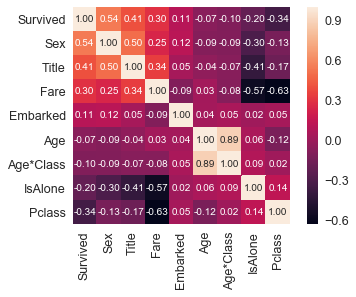

In [45]:
# Survived与其他特征之间的相关性
corrmat = train_df.corr()

k = 10
cols = corrmat.nlargest(k,'Survived')['Survived'].index  #取出与Survived相关性最大的十项
cm = np.corrcoef(train_df[cols].values.T)  #相关系数 
sns.set(font_scale = 1.25)
hm = sns.heatmap(cm,cbar = True,annot = True,square = True ,fmt = '.2f',annot_kws = {'size': 10},yticklabels = cols.values,xticklabels = cols.values)
plt.show()

In [46]:
'''
(11)建模，预测，并解决问题

现在我们已经做好了训练模型的准备，在模型训练完后，我们即可将其应用到解决问题中。对于预测的问题，我们至少有60多种算法可供选择。
所以我们必须理解问题的类型和解决方案的需求，这样才能缩小模型的选择范围。现在这个问题是一个分类与回归的问题，
我们希望找出输出（即Survived）与其他特征（即Gender，Age，Port等）之间的关系。因为给定了训练集，所以这在机器学习里是一个有监督学习。
所以现在对算法的需求是：有监督学习加上分类与回归。根据这个条件，我们有以下模型可供选择：

Logistic Regression
kNN 
SVM
Naïve Bayes classifier
Decision Tree
Random Forrest
Perceptron
Artificial neural network
RVM or Relevance Vector Machine
 

现在我们将训练集与测试集再做一下区分：
'''
X_train = train_df.drop('Survived', axis=1)
Y_train = train_df['Survived']
X_test = test_df.drop('PassengerId', axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

In [49]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Pclass       891 non-null int64
Sex          891 non-null int32
Age          891 non-null int32
Fare         891 non-null int32
Embarked     891 non-null int32
Title        891 non-null int64
IsAlone      891 non-null int64
Age*Class    891 non-null int64
dtypes: int32(4), int64(4)
memory usage: 41.8 KB


In [53]:
print(Y_train)

0      0
1      1
2      1
3      1
4      0
5      0
6      0
7      0
8      1
9      1
10     1
11     1
12     0
13     0
14     0
15     1
16     0
17     1
18     0
19     1
20     0
21     1
22     1
23     1
24     0
25     1
26     0
27     0
28     1
29     0
      ..
861    0
862    1
863    0
864    0
865    1
866    1
867    0
868    0
869    1
870    0
871    1
872    0
873    0
874    1
875    1
876    0
877    0
878    0
879    1
880    1
881    0
882    0
883    0
884    0
885    0
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [ ]:
'''
Logistic Regression 是一个非常有用的模型，可以在工作流程里优先使用。
它通过使用估计概率的方法衡量了离散型特征与其他特征之间的关系，是一个渐增型的逻辑分布。
'''
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

#80.36

In [ ]:
'''
我们可以用Logistic Regression来验证我们之间做的假设与结论。
这个可以通过计算特征值的系数来达成。
正系数可以提升对数几率（所以增长了概率），负系数会降低对数几率（因此降低了概率）：
'''
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])
coeff_df.sort_values(by='Correlation', ascending=False)



In [ ]:
'''
从上面的结果我们可以看出：
1. Sex是有最高正系数的特征。这个表面当Sex 的值增加时（从male：0到female：1），Survived=1的概率增加最多
2. 相反的，当Pclass增加时，Survived=1的概率减少最多
3. 从结果来看，我们创建的新特征Age*Class非常有用，因为它与Survived的负相关性是第二高的
4. Title是第二高的正系数特征
'''

# 下一步我们使用SVM来分析数据并做分类与回归分析。
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

#83.84
# 可以看到使用SVM后的正确率得到了提升

In [ ]:
# 在模式识别中，KNN算法是一种非参数的方法，用于做分类与回归。使用KNN来分析此问题的话
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

#84.74
# 可以看到使用KNN的正确率比SVM更高

In [ ]:
# 我们试试朴素贝叶斯
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

#72.28
# 看来在这个问题中使用朴素贝叶斯不是一个很好的选择，从当前来看，它的正确率是最低的。

In [ ]:
# 接下来我们试试 perceptron（感知机）算法，它可以用于二分类问题
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

#78.0
# 可以看到perceptron的正确率也不高

In [ ]:
# 接下来试试Linear SVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

#79.12

In [ ]:
# 随机梯度下降分类器
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

#75.2

In [ ]:
# 决策树算法
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

#86.76
# 决策树的算法使得正确率达到了一个更高的值。在目前为止，它的正确率是最高的。

In [ ]:
# 我们看看随机森林，随机森林通过组合多个决策树算法来完成
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

#86.76
# 过比较模型的正确率，我们决定使用最高正确率的模型，即随机森林的输出作为结果提交

In [ ]:
# 模型评价
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression',
              'Random Forest', 'Naive Bayes', 'Perceptron',
              'Stochastic Gradient Decent', 'Linear SVC',
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log,
              acc_random_forest, acc_gaussian, acc_perceptron,
              acc_sgd, acc_linear_svc, acc_decision_tree]})

models.sort_values(by='Score', ascending=False)

# 其中决策树与随机森林的正确率最高，但是我们在这里会选择随机森林算法，因为它相对于决策树来说，弥补了决策树有可能过拟合的问题。